In [208]:
import pandas as pd

try:
      file_path = 'Truck_sales.csv'
      df_truck = pd.read_csv(file_path)
      print(f"Файл {file_path} загружен")

except Exception as e: # Catching a more general exception
      print(f"Ошибка загрузки файла: {e}")

Файл Truck_sales.csv загружен


In [209]:
#Dataset: https://www.kaggle.com/datasets/ddosad/dummy-truck-sales-for-time-series
#Приведенный ниже набор данных содержит ежемесячные данные о продажах грузовиков определенной компании в течение года.
#Подозреваю что набор синтетический, но в принципе это не имеет значения, пусть это будет США и какой-нибудь Freightliner Cascadia
#Состав dataset'а:
#Month-Year: месяц и год продажи
#Number_Trucks_Sold: количество проданных грузовиков

In [210]:
df_truck.head(10)

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223
5,03-Jun,208
6,03-Jul,228
7,03-Aug,228
8,03-Sep,188
9,03-Oct,165


In [211]:
#Информация о dataset
df_truck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month-Year          144 non-null    object
 1   Number_Trucks_Sold  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [212]:
df_truck.describe()


,Number_Trucks_Sold
count,144.000000
mean,428.729167
std,188.633037
min,152.000000
25%,273.500000
50%,406.000000
75%,560.250000
max,958.000000


In [213]:
#Пустые значения - отсутствуют
print(df_truck.isnull().sum())

Month-Year            0
Number_Trucks_Sold    0
dtype: int64


In [214]:
#Добавим столбец sales_date: "Month-Year" в формате datetime
df_truck['sales_date'] = pd.to_datetime(df_truck['Month-Year'], format='%y-%b')

In [215]:
#Дополнительно столбец с месяцем и столбец с годом
df_truck['sales_year'] = df_truck['sales_date'].dt.year
df_truck['sales_month'] = df_truck['sales_date'].dt.month

In [216]:
df_truck.head(10)

,Month-Year,Number_Trucks_Sold,sales_date,sales_year,sales_month
0,03-Jan,155,2003-01-01,2003,1
1,03-Feb,173,2003-02-01,2003,2
2,03-Mar,204,2003-03-01,2003,3
3,03-Apr,219,2003-04-01,2003,4
4,03-May,223,2003-05-01,2003,5
5,03-Jun,208,2003-06-01,2003,6
6,03-Jul,228,2003-07-01,2003,7
7,03-Aug,228,2003-08-01,2003,8
8,03-Sep,188,2003-09-01,2003,9
9,03-Oct,165,2003-10-01,2003,10


In [217]:
#Проверим по всем ли месяцам есть данные
full_range = pd.date_range(start=df_truck['sales_date'].min(), freq='MS', end=df_truck['sales_date'].max()) #MS - первое число месяца

df_full = pd.DataFrame({'full_date': full_range}) # Создание DataFrame со всеми месяцами диапазона

#Слияние DataFrames
df_truck = df_full.merge(df_truck[['sales_date','sales_year','sales_month','Number_Trucks_Sold']], left_on='full_date', right_on='sales_date', how = 'left')

#Если диапазон в файле был полностью заполнен - то пустых значений не будет, так как их не было изначально, иначе  - будут
print(df_truck.isnull().sum())

full_date             0
sales_date            0
sales_year            0
sales_month           0
Number_Trucks_Sold    0
dtype: int64


In [218]:
#Переименуем столбец
df_truck.rename(columns={'Number_Trucks_Sold':'truck_sales'}, inplace=True)

In [219]:
#Индекс
df_truck = df_truck.set_index('full_date')

In [220]:
#сортировка по дате
df_truck.sort_values(by='sales_date', inplace=True)

In [221]:
vts = df_truck['truck_sales'] # перменная что бы покороче

In [222]:
#Посмотрим что с данными
monthly_sales_data = pd.pivot_table(df_truck, values = "truck_sales", columns = "sales_year", index = "sales_month")
monthly_sales_data

sales_year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
sales_month,,,,,,,,,,,,
1,155.0,160.0,201.0,237.0,272.0,283.0,336.0,394.0,437.0,471.0,499.0,578.0
2,173.0,185.0,220.0,263.0,287.0,275.0,341.0,405.0,440.0,465.0,501.0,572.0
3,204.0,217.0,274.0,297.0,363.0,362.0,411.0,488.0,548.0,558.0,625.0,646.0
4,219.0,229.0,276.0,307.0,398.0,385.0,455.0,530.0,590.0,590.0,671.0,781.0
5,223.0,231.0,318.0,338.0,424.0,432.0,499.0,587.0,656.0,671.0,777.0,872.0
6,208.0,230.0,274.0,336.0,374.0,407.0,485.0,576.0,650.0,670.0,727.0,824.0
7,228.0,262.0,307.0,354.0,407.0,465.0,561.0,636.0,716.0,756.0,844.0,958.0
8,228.0,262.0,307.0,373.0,419.0,451.0,535.0,624.0,719.0,778.0,861.0,933.0
9,188.0,219.0,255.0,289.0,329.0,359.0,432.0,492.0,560.0,560.0,641.0,704.0


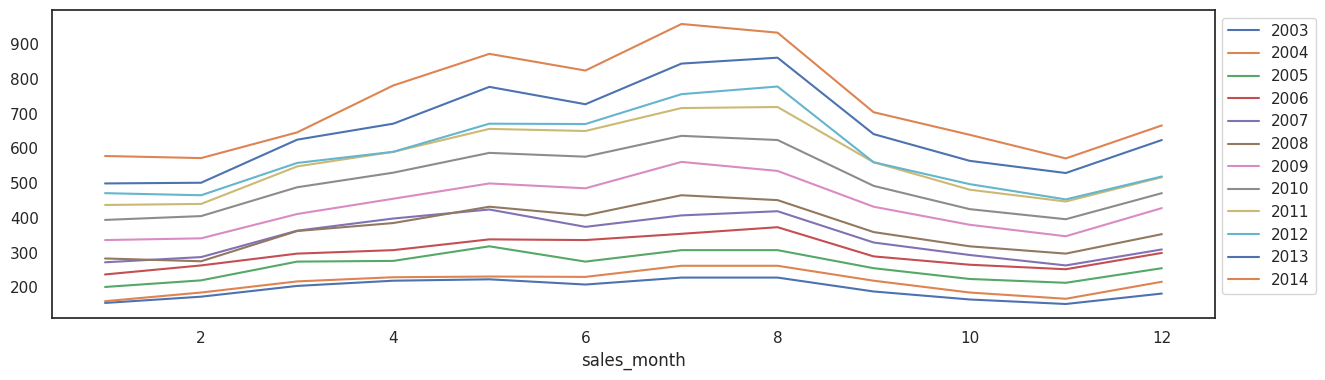

In [223]:
# Commented out IPython magic to ensure Python compatibility.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="white", rc={'figure.figsize': (15, 4)})
ax = monthly_sales_data.plot()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_facecolor('white')
plt.show()


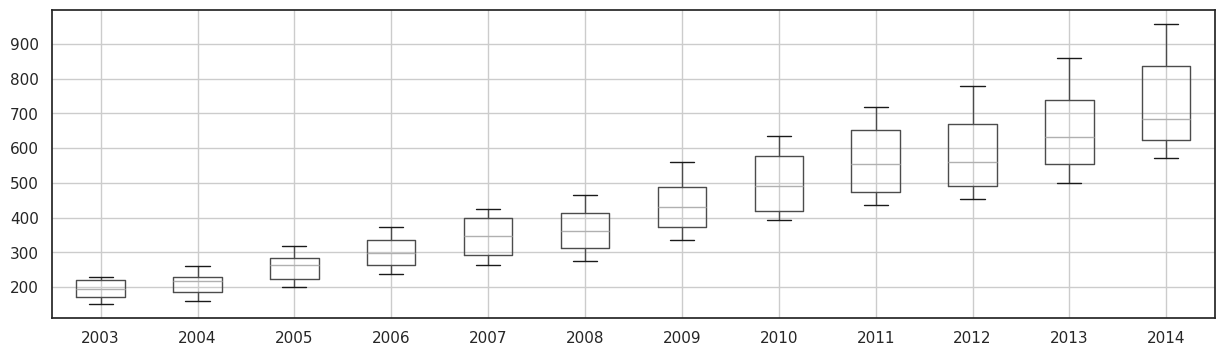

In [224]:
sns.set(style="white", rc={'figure.figsize': (15, 4)})
monthly_sales_data.boxplot()
plt.show()

In [225]:
yearly_sales_data = pd.pivot_table(df_truck, values = "truck_sales", columns = "sales_month", index = "sales_year")
yearly_sales_data

sales_month,1,2,3,4,5,6,7,8,9,10,11,12
sales_year,,,,,,,,,,,,
2003,155.0,173.0,204.0,219.0,223.0,208.0,228.0,228.0,188.0,165.0,152.0,182.0
2004,160.0,185.0,217.0,229.0,231.0,230.0,262.0,262.0,219.0,185.0,167.0,216.0
2005,201.0,220.0,274.0,276.0,318.0,274.0,307.0,307.0,255.0,224.0,213.0,255.0
2006,237.0,263.0,297.0,307.0,338.0,336.0,354.0,373.0,289.0,265.0,252.0,299.0
2007,272.0,287.0,363.0,398.0,424.0,374.0,407.0,419.0,329.0,293.0,263.0,309.0
2008,283.0,275.0,362.0,385.0,432.0,407.0,465.0,451.0,359.0,318.0,297.0,353.0
2009,336.0,341.0,411.0,455.0,499.0,485.0,561.0,535.0,432.0,380.0,347.0,428.0
2010,394.0,405.0,488.0,530.0,587.0,576.0,636.0,624.0,492.0,425.0,396.0,471.0
2011,437.0,440.0,548.0,590.0,656.0,650.0,716.0,719.0,560.0,481.0,447.0,517.0


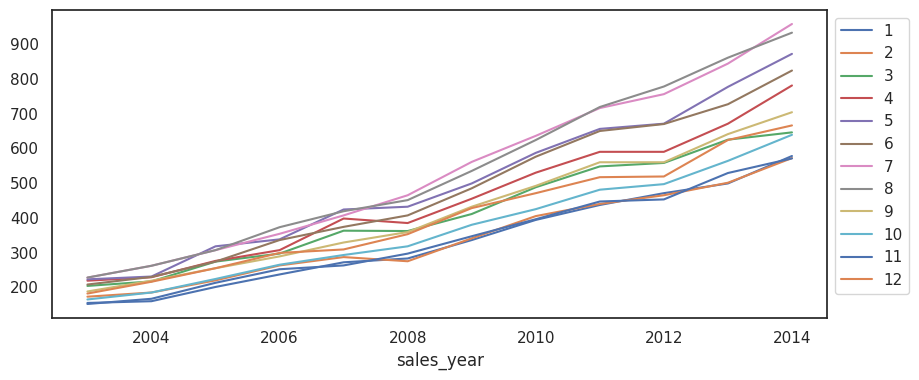

In [226]:
sns.set(style="white", rc={'figure.figsize': (10, 4)})
ax = yearly_sales_data.plot()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_facecolor('white')
plt.show()

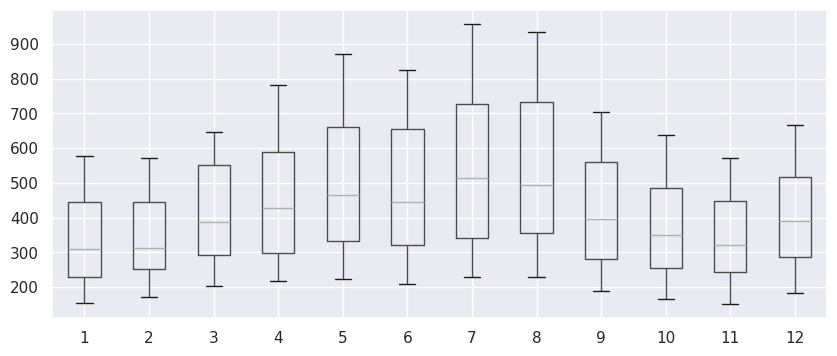

In [227]:
sns.set(rc={'figure.figsize': (10, 4)})
yearly_sales_data.boxplot()
plt.show()

In [228]:
#Выводы
#Продажи грузовиков растут с каждым годом.
#Июль/август — пиковые месяцы продаж.

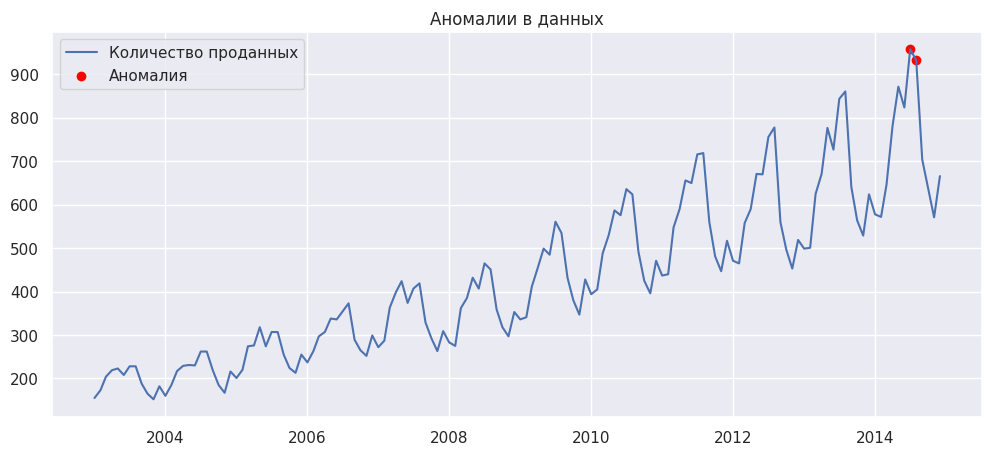

In [229]:
# Аномалии (через Isolation Forest)
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)# 1% - аномальных данных
df_truck['an'] = iso.fit_predict(df_truck[['truck_sales']])
anomalies = df_truck[df_truck['an'] == -1]

plt.figure(figsize=(12,5))
plt.plot( df_truck['truck_sales'], label='Количество проданных')
plt.scatter(anomalies['sales_date'], anomalies['truck_sales'], color='red', label='Аномалия')
plt.legend()
plt.title('Аномалии в данных')
plt.show()

#Надо было найти 1% ошибок, вот и нашли

In [230]:
#Оценим свойства time series

#Тест Дики-Фуллера
import numpy as np
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_truck['truck_sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0]> result[4]['5%']:
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

#Результаты теста Дики-Фуллера для не стационарного временного ряда:
# ADF статистика: 1.115893. Положительное значение статистики - признак нестационарности.
# p-значение: 0.995350. Значение значительно выше 0.05, не отвергаем гипотезу о нестационарности ряда.
# Критические значения для разных уровней значимости показывают, что статистика ADF выше этих значений, что также подтверждает нестационарность ряда.

ADF Statistic: 1.115893
p-value: 0.995350
	1%: -3.482
	5%: -2.884
	10%: -2.579
есть единичные корни, ряд не стационарен


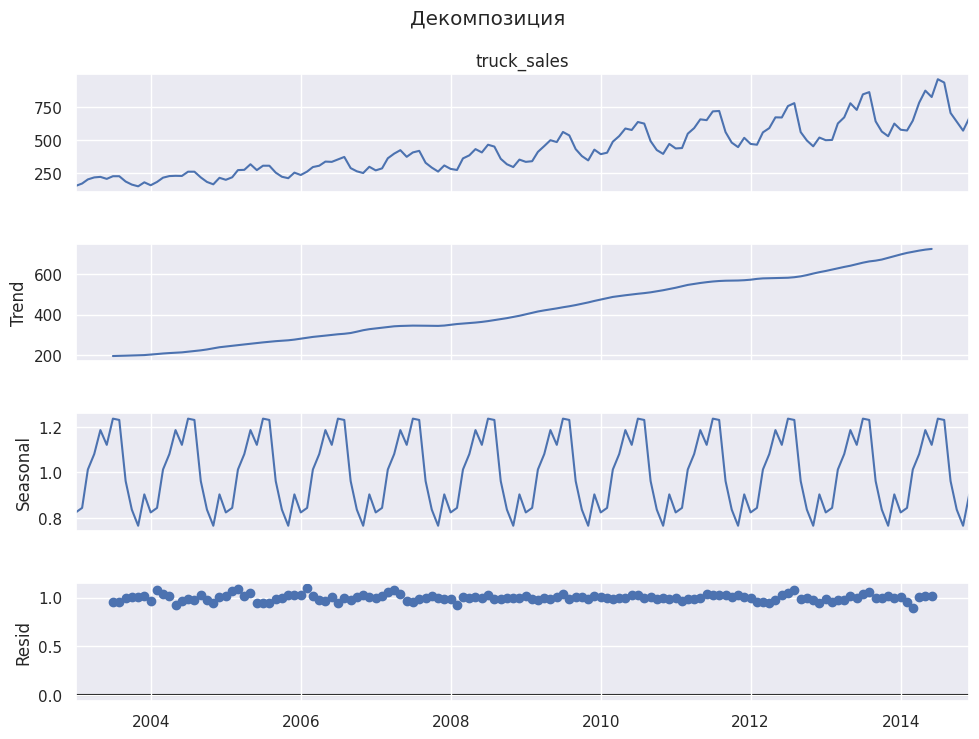

In [231]:
#Декомпозиция ряда
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(vts, model='multiplicative')

fig = decomposition.plot()
fig.set_figwidth(10)
fig.set_figheight(8)
fig.suptitle('Декомпозиция')
plt.show()

In [232]:
#Тренд: 12-месячная скользящая средняя представляет собой довольно прямую линию, что указывает на линейный тренд.
#Сезонность: 12-месячная сезонность отчетливо видна.
#Шум - случайный: мультипликативная модель работает, поскольку в остатках нет закономерностей.

#График 1: Ряд данных, который был разложен.
#График 2: Составляющая тренда
#График 3: Сезонная составляющая ряда данных.
#График 4: Остаточный компонент ряда данных - шум

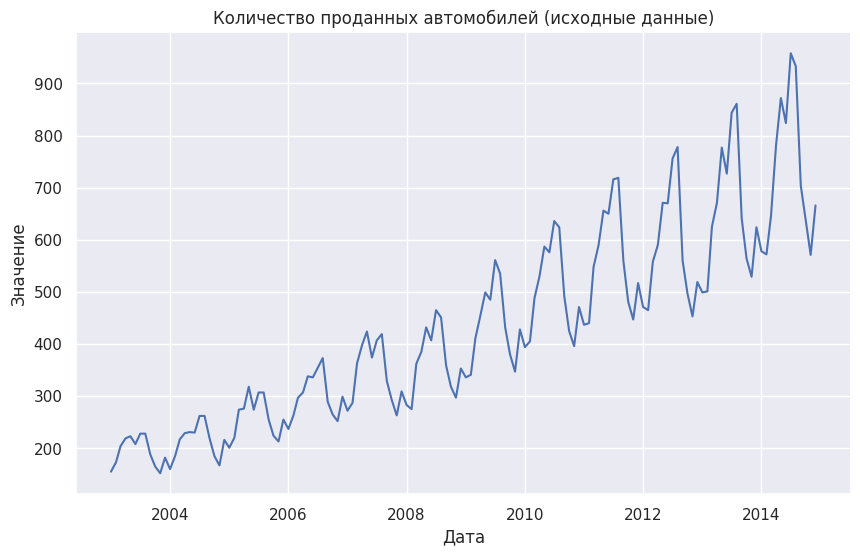

In [233]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

# Визуализируем временной ряд
plt.figure(figsize=(10, 6))
plt.plot(df_truck['sales_date'], df_truck['truck_sales'])
plt.title("Количество проданных автомобилей (исходные данные)")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.grid(True)
plt.show()

<Figure size 1000x400 with 0 Axes>

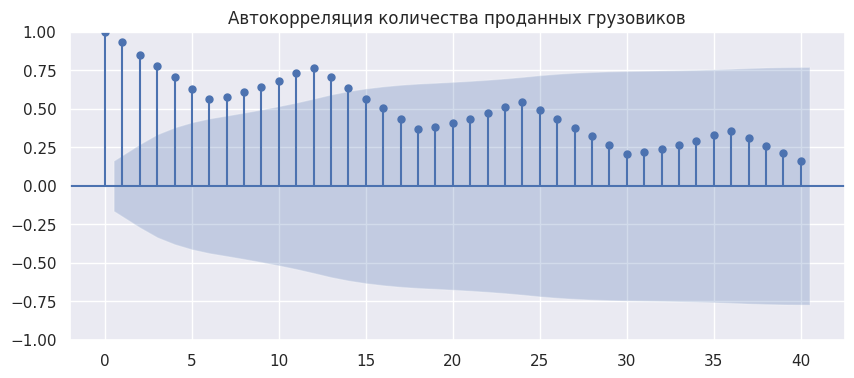

In [234]:
# Автокорреляция
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(10, 4))
plot_acf(df_truck['truck_sales'], lags=40)
plt.title('Автокорреляция количества проданных грузовиков')
plt.show()

In [235]:
#Функция plot_acf используется для визуализации функции автокорреляции (ACF) временного ряда.
#ACF измеряет корреляцию между временным рядом и его лагированными версиями.
#Этот график является основополагающим инструментом анализа временных рядов для выявления закономерностей и
#определения порядка компонентов скользящего среднего (MA) в моделях, таких как ARIMA.

#Бледно-голубая фигура демонстрирует величину задержки между первым и каждым последующим наблюдением, потому высота ее растет по мере перехода к новому наблюдению.
#Столбцы с шарообразными наконечниками — это своеобразная визитная карточка коррелограммы, высота столбца отображает степень корреляции.

Text(0, 0.5, 'Truck Sales')

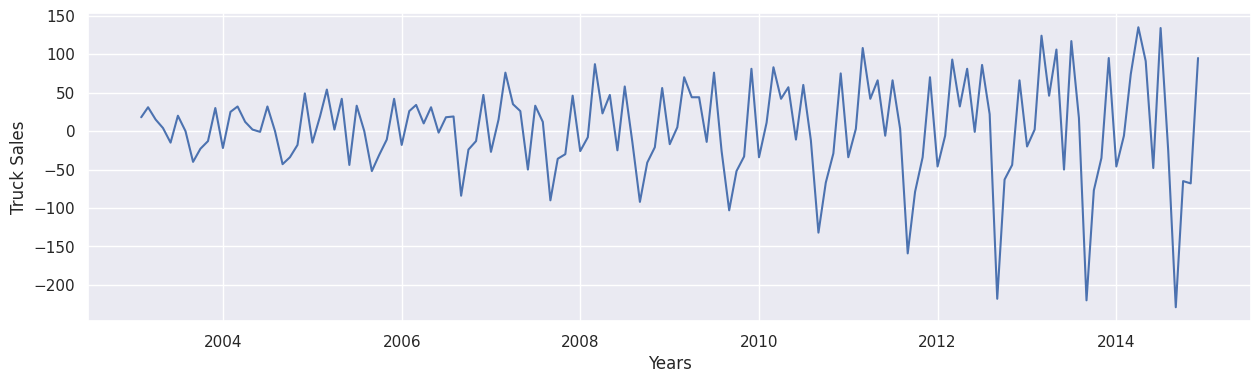

In [236]:
#Для части моделей, которыми я буду пользоваться, необходим стационарные временной ряд

#Выполнение дифференциации (d=1), поскольку данные нестационарны:
plt.figure(figsize=(15, 4))
plt.plot(vts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Truck Sales')

Text(0, 0.5, 'Truck Sales')

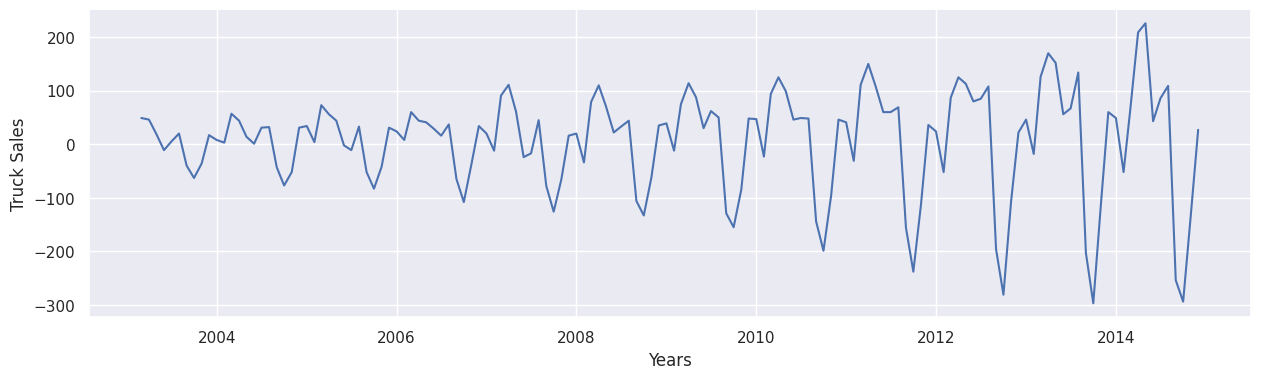

In [237]:
#Попробуем для d=2
plt.figure(figsize=(15, 4))
plt.plot(vts.diff(periods=2))
plt.xlabel('Years')
plt.ylabel('Truck Sales')


Text(0, 0.5, 'Log (Truck Sales)')

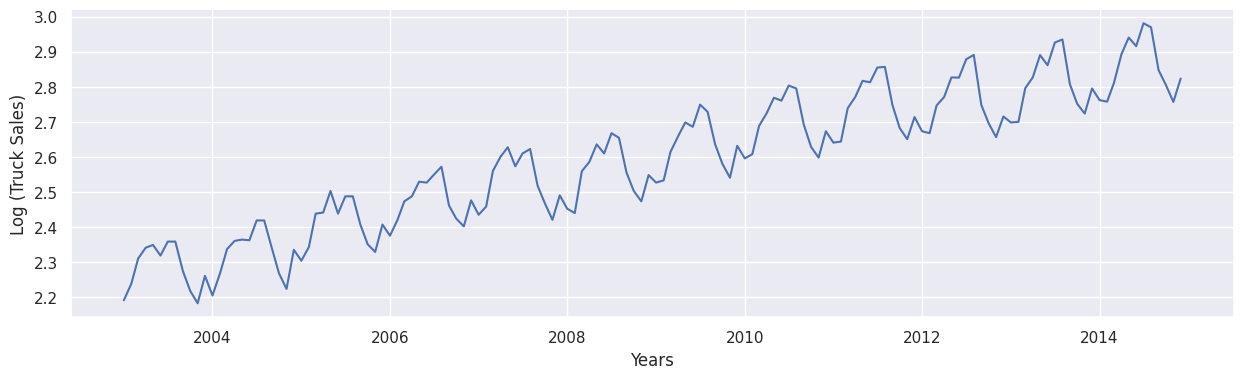

In [238]:
#Мы наблюдаем сезонность даже после дифференцирования. Это предполагает логарифмическое преобразование данных.
plt.figure(figsize=(15, 4))
plt.plot(np.log10(vts))
plt.xlabel('Years')
plt.ylabel('Log (Truck Sales)')


Text(0, 0.5, 'Differenced Log (Truck Sales)')

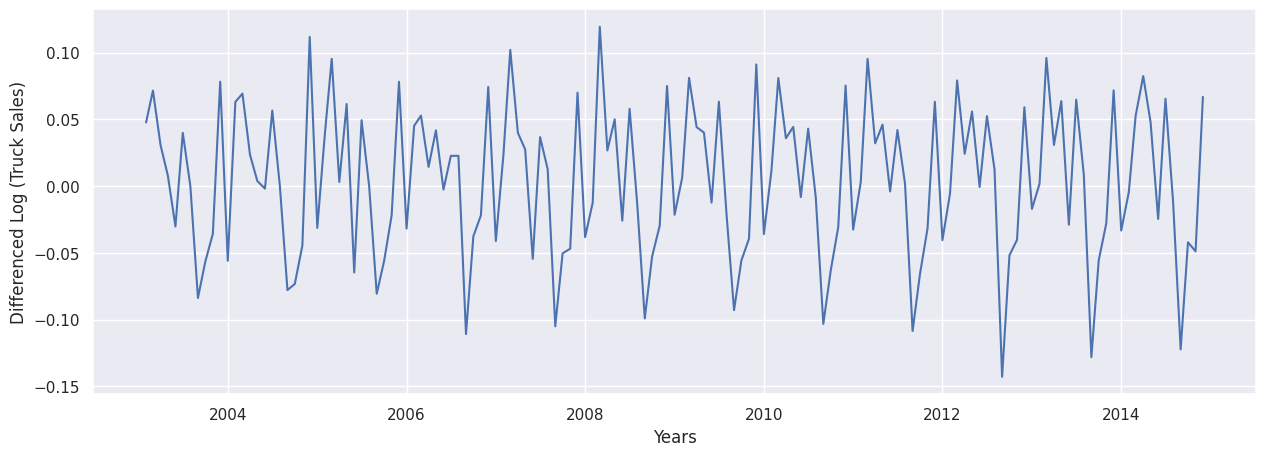

In [239]:
#Мы наблюдаем тренд и сезонность даже после логарифмирования наблюдений. Попробуем совместить для d=1
plt.figure(figsize=(15, 5))
plt.plot(np.log10(vts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Truck Sales)')

Text(0, 0.5, 'Differenced Log (Truck Sales)')

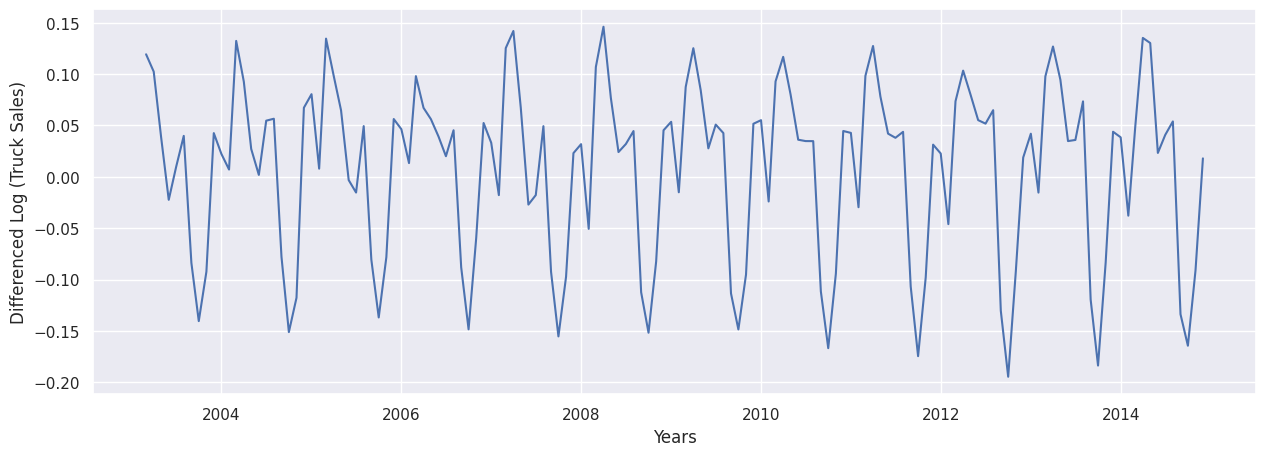

In [240]:
#Для d=2
plt.figure(figsize=(15, 5))
plt.plot(np.log10(vts).diff(periods=2))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Truck Sales)')

In [241]:
#Тест Дики-Фуллера
vts_static = np.log10(vts).diff(periods=2)
vts_static=vts_static.dropna()

result = adfuller(vts_static)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0]> result[4]['5%']:
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

ADF Statistic: -3.210712
p-value: 0.019373
	1%: -3.482
	5%: -2.884
	10%: -2.579
единичных корней нет, ряд стационарен


In [242]:
#Результаты теста Дики-Фуллера для не стационарного временного ряда:
# ADF статистика: -3.210712. Отрицательно значение статистики - признак стационарности.
# p-значение: 0.019373. Значение меньше выше 0.05.
# Критические значения для разных уровней значимости показывают, что статистика ADF выше этих значений, что также подтверждает нестационарность ряда.

In [243]:
#Модель номер 1: ARMA Model

#Улучшение моделей авторегрессии с помощью прогнозов на основе скользящего среднего.
#Модели ARMA состоят из двух компонентов:
#Модель AR: данные моделируются на основе прошлых наблюдений.
#Модель MA: ошибки предыдущих прогнозов учитываются в модели.

#Разделим данные train and test
df_truck['date'] = df_truck.index
train = df_truck[df_truck.index < '2013-01-01']
test = df_truck[df_truck.index >= '2013-01-01']

In [244]:
dftest = adfuller(train['truck_sales'])#Проверим на стационарность
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -0.484
DF test p-value is 0.8951


In [245]:
train_sales_ts_log = np.log10(train['truck_sales'])
#Логарифмическое преобразование обучающих данных для того, чтобы сделать временной ряд стационарным, как мы это делали с полными данными

In [246]:
!pip install -q pmdarima

In [247]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

#ARMA Model building to estimate best 'p' , 'q' ( Lowest AIC Approach )
#тестировались варианты [(1, 0, 1), (1, 0, 2), (1, 0, 3), (2, 0, 1), (2, 0, 2), (2, 0, 3), (3, 0, 1), (3, 0, 2), (3, 0, 3)]
ARIMA_model = ARIMA(train_sales_ts_log,order = (3,1,3))
ARIMA_result = ARIMA_model.fit()

In [248]:
print(ARIMA_result.summary().tables[0])
print(ARIMA_result.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:            truck_sales   No. Observations:                  120
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 193.696
Date:                Wed, 15 Oct 2025   AIC                           -373.393
Time:                        21:40:18   BIC                           -353.939
Sample:                    01-01-2003   HQIC                          -365.493
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7144      0.160      4.451      0.000       0.400       1.029
ar.L2         -0.7711      0.065    -11.787      0.000      -0.899      -0.643
ar.L3          0.6478      0.129      5.022      0.0

In [249]:
#Подсчет RMSE модели
pred_dynamic = ARIMA_result.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)
pred99 = ARIMA_result.get_forecast(steps=len(test), alpha=0.1)#forecasting values

In [250]:
# Extract the predicted and true values of our time series
truck_sales_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['truck_sales_forecasted'] = np.power(10, pred99.predicted_mean)

In [251]:
testCopy1

,sales_date,sales_year,sales_month,truck_sales,an,date,truck_sales_forecasted
full_date,,,,,,,
2013-01-01,2013-01-01,2013,1,499,1,2013-01-01,518.888179
2013-02-01,2013-02-01,2013,2,501,1,2013-02-01,502.209564
2013-03-01,2013-03-01,2013,3,625,1,2013-03-01,512.669599
2013-04-01,2013-04-01,2013,4,671,1,2013-04-01,533.475321
2013-05-01,2013-05-01,2013,5,777,1,2013-05-01,528.886023
2013-06-01,2013-06-01,2013,6,727,1,2013-06-01,516.604198
2013-07-01,2013-07-01,2013,7,844,1,2013-07-01,524.750724
2013-08-01,2013-08-01,2013,8,861,1,2013-08-01,537.335785
2013-09-01,2013-09-01,2013,9,641,1,2013-09-01,531.800734


In [252]:
mse_ARMA = ((testCopy1['truck_sales'] - testCopy1['truck_sales_forecasted']) ** 2).mean()
rmse_ARMA = np.sqrt(mse_ARMA)
print('The Root Mean Squared Error ARMA {}'.format(round(rmse_ARMA, 4)))

The Root Mean Squared Error ARMA 208.3608


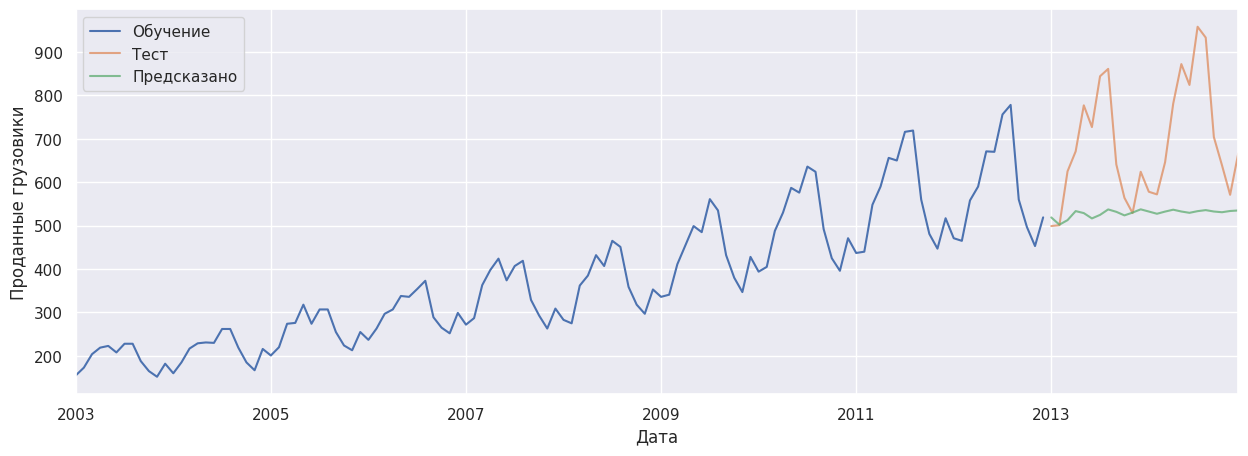

In [253]:
#Визуализация
axis = train['truck_sales'].plot(label='Обучение', figsize=(15, 5))
testCopy1['truck_sales'].plot(ax=axis, label='Тест', alpha=0.7)
testCopy1['truck_sales_forecasted'].plot(ax=axis, label='Предсказано', alpha=0.7)
axis.set_xlabel('Дата')
axis.set_ylabel('Проданные грузовики')
plt.legend(loc='best')
plt.show()
plt.close()

In [254]:
#Модель SARIMA
#Модели ARIMA можно расширить/улучшить для обработки сезонных компонентов ряда данных.

In [255]:
SARIMA_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                         order=(1, 0, 1),
                                         seasonal_order=(1, 0, 1, 12),
                                         enforce_stationarity=True)
#Здесь:
#- p = порядок несезонной авторегрессии = 1,
#- d = несезонная дифференциация = 0,
#- q = порядок несезонной скользящей средней = 1,
#- P = порядок сезонной авторегрессии = 1,
#- D = сезонная дифференциация = 0,
#- Q = порядок сезонной скользящей средней = 1,
#- S = временной интервал повторяющегося сезонного паттерна = 12.
SARIMA_results = SARIMA_model.fit()



In [256]:
print(SARIMA_results.summary().tables[0])
print(SARIMA_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                        truck_sales   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 302.280
Date:                            Wed, 15 Oct 2025   AIC                           -594.560
Time:                                    21:40:50   BIC                           -580.622
Sample:                                01-01-2003   HQIC                          -588.900
                                     - 12-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9956      0.006    159.078      0.000       0.983       1.008
ma.L1         -0.2952      0.084   

In [257]:
pred_dynamic_SARIMA = SARIMA_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)
pred99_SARIMA = SARIMA_results.get_forecast(steps=len(test), alpha=0.1)

In [258]:
truck_sales_forecasted = pred_dynamic_SARIMA.predicted_mean
testCopy_SARIMA = test.copy()
testCopy_SARIMA['truck_sales_forecasted'] = np.power(10, pred99_SARIMA.predicted_mean)

In [259]:
testCopy_SARIMA

,sales_date,sales_year,sales_month,truck_sales,an,date,truck_sales_forecasted
full_date,,,,,,,
2013-01-01,2013-01-01,2013,1,499,1,2013-01-01,481.762887
2013-02-01,2013-02-01,2013,2,501,1,2013-02-01,482.500224
2013-03-01,2013-03-01,2013,3,625,1,2013-03-01,584.517031
2013-04-01,2013-04-01,2013,4,671,1,2013-04-01,623.895217
2013-05-01,2013-05-01,2013,5,777,1,2013-05-01,697.295511
2013-06-01,2013-06-01,2013,6,727,1,2013-06-01,687.591665
2013-07-01,2013-07-01,2013,7,844,1,2013-07-01,767.214134
2013-08-01,2013-08-01,2013,8,861,1,2013-08-01,773.016644
2013-09-01,2013-09-01,2013,9,641,1,2013-09-01,585.765108


In [260]:
mse_SARIMA = ((testCopy_SARIMA['truck_sales'] - testCopy_SARIMA['truck_sales_forecasted']) ** 2).mean()
rmse_SARIMA = np.sqrt(mse_SARIMA)
print('The Root Mean Squared Error of SARIMA is {}'.format(round(rmse_SARIMA, 4)))

The Root Mean Squared Error of SARIMA is 84.28


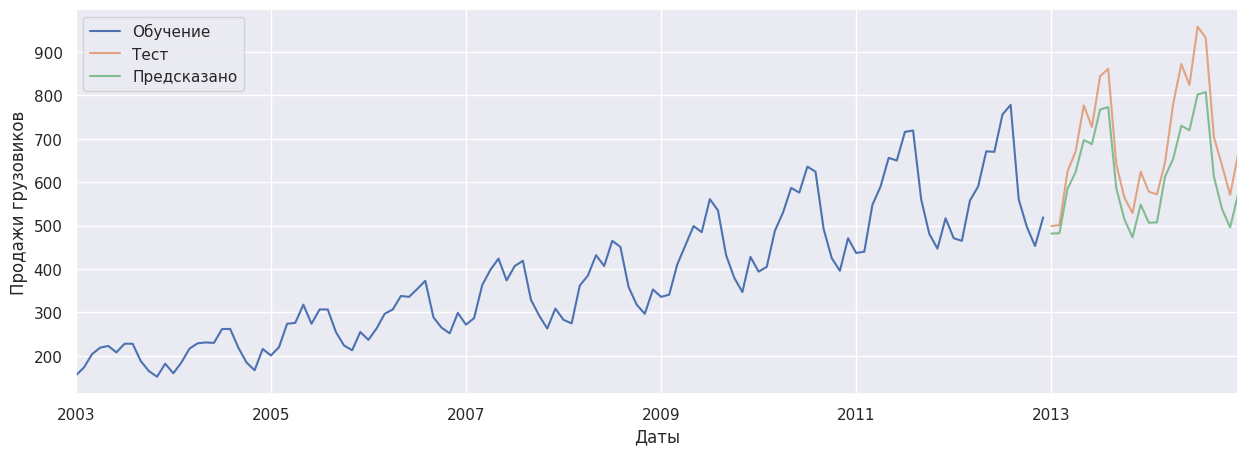

In [261]:
axis = train['truck_sales'].plot(label='Обучение', figsize=(15, 5))
testCopy_SARIMA['truck_sales'].plot(ax=axis, label='Тест', alpha=0.7)
testCopy_SARIMA['truck_sales_forecasted'].plot(ax=axis, label='Предсказано', alpha=0.7)
axis.set_xlabel('Даты')
axis.set_ylabel('Продажи грузовиков')
plt.legend(loc='best')
plt.show()
plt.close()

In [262]:
#XGBoost Time Series

In [263]:
target_XGB = "truck_sales"
features_XGB = ["sales_year","sales_month"]

X_train_XGB = train[features_XGB]
y_train_XGB = train[target_XGB]

X_test_XGB = test[features_XGB]
y_test_XGB = test[target_XGB]

In [264]:
import xgboost as xgb
model_XGB = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
model_XGB.fit(X_train_XGB, y_train_XGB,
        eval_set=[(X_train_XGB, y_train_XGB), (X_test_XGB, y_test_XGB)],
        verbose=100)

[0]	validation_0-rmse:400.31860	validation_1-rmse:699.09558
[100]	validation_0-rmse:161.05936	validation_1-rmse:368.80219
[200]	validation_0-rmse:70.23905	validation_1-rmse:230.60645
[300]	validation_0-rmse:34.75696	validation_1-rmse:174.06909
[400]	validation_0-rmse:20.78377	validation_1-rmse:147.38025
[500]	validation_0-rmse:14.66689	validation_1-rmse:134.16611
[600]	validation_0-rmse:11.09662	validation_1-rmse:127.95739
[700]	validation_0-rmse:9.41088	validation_1-rmse:124.80422
[800]	validation_0-rmse:8.37514	validation_1-rmse:122.81639
[900]	validation_0-rmse:7.75230	validation_1-rmse:121.57802
[999]	validation_0-rmse:7.27785	validation_1-rmse:120.75926


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

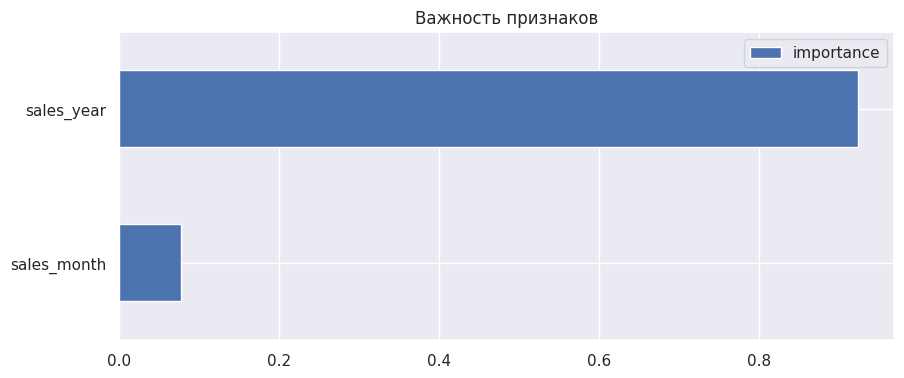

In [265]:
feature_importance_XGB = pd.DataFrame(data=model_XGB.feature_importances_,
             index=model_XGB.feature_names_in_,
             columns=['importance'])
feature_importance_XGB.sort_values('importance').plot(kind='barh', title='Важность признаков')
plt.show()

In [266]:
predictions_XGBR = model_XGBR.predict(X_test_XGB)
predictions_XGBR

array([464.83057, 464.83057, 556.2373 , 594.84424, 671.68494, 667.78534,
       758.1447 , 762.0737 , 561.7783 , 493.67453, 459.85706, 514.70514,
       464.83057, 464.83057, 556.2373 , 594.84424, 671.68494, 667.78534,
       758.1447 , 762.0737 , 561.7783 , 493.67453, 459.85706, 514.70514],
      dtype=float32)

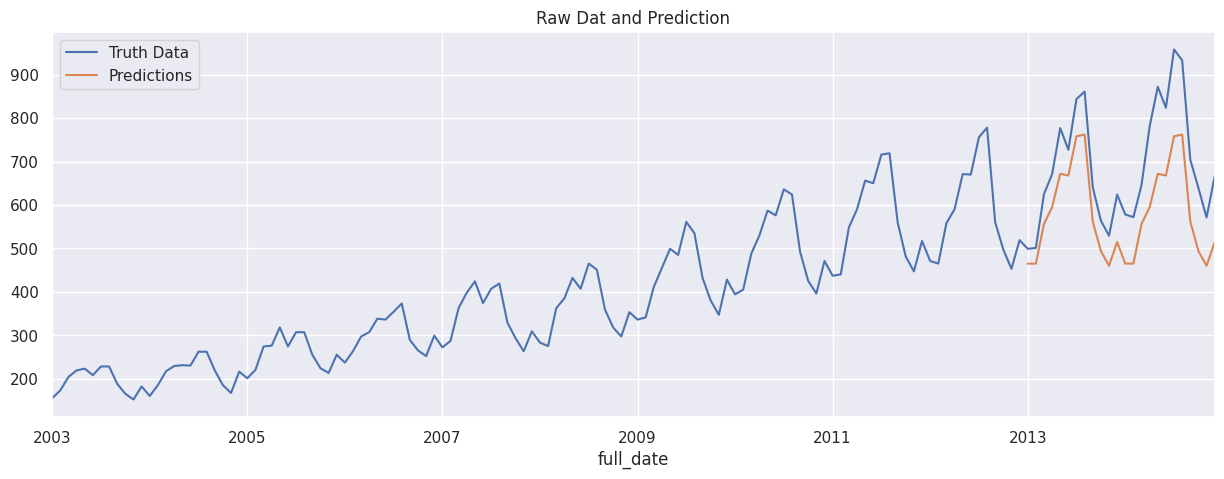

In [267]:
test.loc[:,"predictions"] = predictions_XGBR
df_XGBR = df_truck.merge(test[["predictions"]], how='left', right_index=True, left_index=True)
ax = df_XGBR["truck_sales"].plot(figsize=(15,5))
df_XGBR["predictions"].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [268]:
rmse_XGB = np.sqrt(mean_squared_error(test['truck_sales'], test['predictions']))
print(f'RMSE Score of XGBRegressor: {rmse_XGB:0.2f}')

RMSE Score of XGBRegressor: 120.76


In [269]:
# LSTM
!pip install -q tensorflow

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Подготовьте данные для модели LSTM:
# Преобразуйте данные в массив NumPy
data_values_LSTM = df_truck['truck_sales'].values.reshape(-1, 1)

# Нормализуйте данные (масштабируйте в диапазон [0, 1])
scaler = MinMaxScaler()
data_scaled_LSTM = scaler.fit_transform(data_values_LSTM)

# Разделите данные на обучающую и тестовую выборки
train_size_LSTM = int(len(data_scaled_LSTM) * 0.8)
train_data_LSTM = data_scaled_LSTM[:train_size_LSTM]
test_data_LSTM = data_scaled_LSTM[train_size_LSTM:]

In [271]:
# Функция для создания последовательных данных для модели LSTM
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Определите длину последовательности и создайте последовательные данные
seq_length_LSTM = 12  # Например, используйте данные за последний год (12 месяцев)
X_train_LSTM, y_train_LSTM = create_sequences(train_data_LSTM, seq_length_LSTM)
X_test_LSTM, y_test_LSTM = create_sequences(test_data_LSTM, seq_length_LSTM)

# Создайте и обучите модель LSTM
model_LSTM = Sequential()
model_LSTM.add(LSTM(50, activation='relu', input_shape=(seq_length_LSTM, 1)))
model_LSTM.add(Dense(1))
model_LSTM.compile(optimizer='adam', loss='mean_squared_error')
model_LSTM.fit(X_train_LSTM, y_train_LSTM, epochs=100, batch_size=32)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1091
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0865
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0586
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0439
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0297
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0164
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0136
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0171
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0152
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0122
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0122
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0111
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0110
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0115
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0100
Epoch 16/100
4/4 ━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


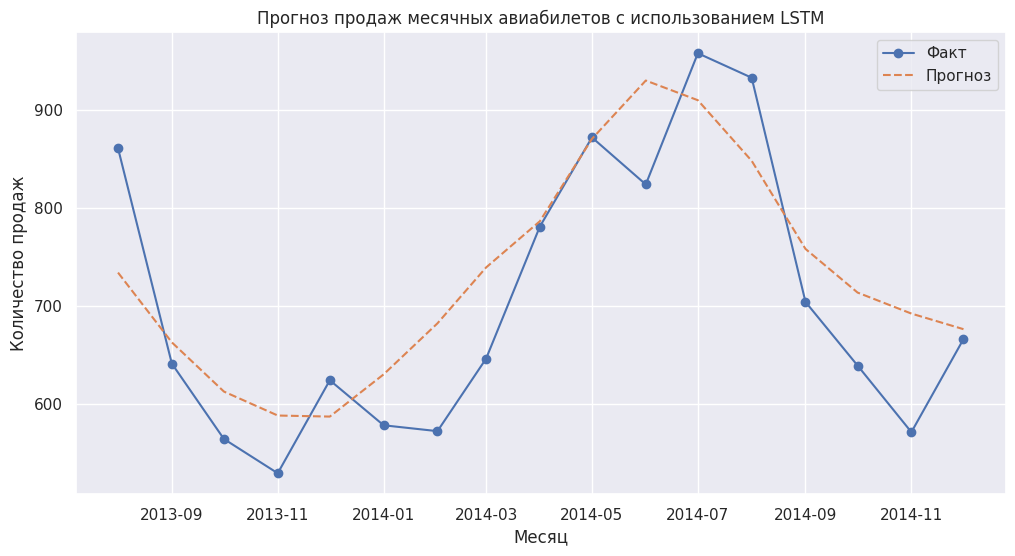

Mean Absolute Error (MAE) for LSTM: 62.020
Mean Squared Error (MSE) for _LSTM: 5374.926
Root Mean Squared Error (RMSE) for LSTM: 73.314


In [272]:
# Прогнозирование на тестовых данных
y_pred_LSTM = model_LSTM.predict(X_test_LSTM)

# Выполните инверсию масштабирования, чтобы получить исходные значения
y_pred_inv_LSTM = scaler.inverse_transform(y_pred_LSTM)
y_test_inv_LSTM = scaler.inverse_transform(y_test_LSTM.reshape(-1, 1))

# Визуализируйте результаты прогноза
plt.figure(figsize=(12, 6))
plt.plot(df_truck.index[-len(y_test_inv_LSTM):], y_test_inv_LSTM, label='Факт', marker='o')
plt.plot(df_truck.index[-len(y_test_inv_LSTM):], y_pred_inv_LSTM, label='Прогноз', linestyle='--')
plt.title("Прогноз продаж месячных авиабилетов с использованием LSTM")
plt.xlabel("Месяц")
plt.ylabel("Количество продаж")
plt.legend()
plt.grid(True)
plt.show()

# Оценка точности прогноза
mae_LSTM = mean_absolute_error(y_test_inv_LSTM, y_pred_inv_LSTM)
mse_LSTM = mean_squared_error(y_test_inv_LSTM, y_pred_inv_LSTM)
rmse_LSTM = np.sqrt(mse_LSTM)

print(f"Mean Absolute Error (MAE) for LSTM: {mae_LSTM:.3f}")
print(f"Mean Squared Error (MSE) for _LSTM: {mse_LSTM:.3f}")
print(f"Root Mean Squared Error (RMSE) for LSTM: {rmse_LSTM:.3f}")

In [286]:
#RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Добавляем временные признаки (например, лаги), чтобы модель учитывала прошлые значения временного ряда.
df_RFR=df_truck.copy()
df_RFR['Lag1'] = df_RFR['truck_sales'].shift(1)
df_RFR['Lag2'] = df_RFR['truck_sales'].shift(2)
df_RFR.dropna(inplace=True)


In [287]:
# Разделение данных на обучающие и тестовые выборки
train_size_RFR = int(len(df_RFR) * 0.8)
train_data_RFR = df_RFR.iloc[:train_size_RFR]
test_data_RFR = df_RFR.iloc[train_size_RFR:]

In [288]:
#Создание и обучение модели случайного леса с временными признаками
model_RFR = RandomForestRegressor(n_estimators=100)
model_RFR.fit(train_data_RFR[['Lag1', 'Lag2']], train_data_RFR['truck_sales'])

RandomForestRegressor()

In [289]:
# Выполнение прогноза на тестовой выборке
test_data_RFR['Predictions'] = model_RFR.predict(test_data_RFR[['Lag1', 'Lag2']])

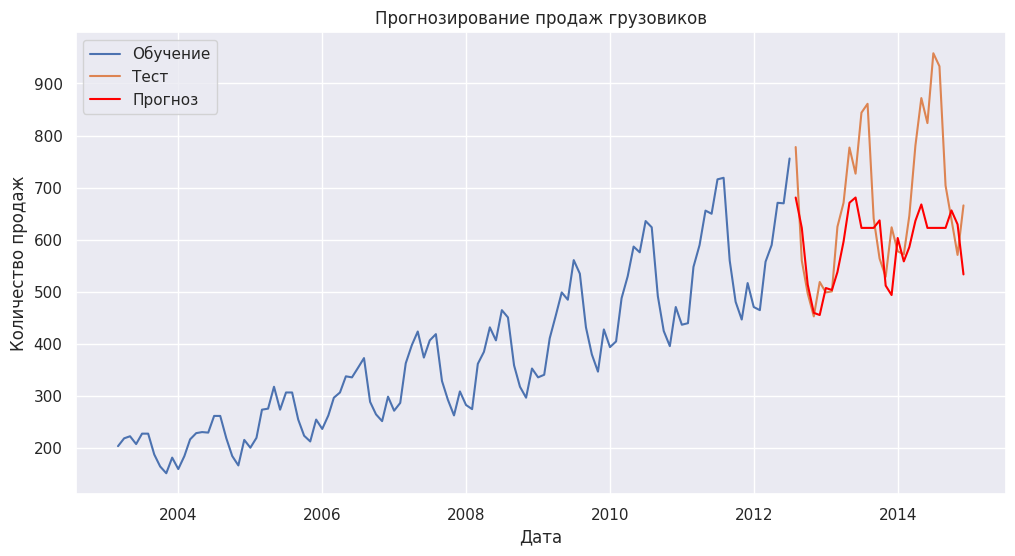

Mean Absolute Error (MAE) для RandomForestRegressor: 98.369
Mean Squared Error (MSE) для RandomForestRegressor: 17813.476
Root Mean Squared Error (RMSE) для RandomForestRegressor: 133.467


In [290]:
# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(train_data_RFR.index, train_data_RFR['truck_sales'], label='Обучение')
plt.plot(test_data_RFR.index, test_data_RFR['truck_sales'], label='Тест')
plt.plot(test_data_RFR.index, test_data_RFR['Predictions'], color='red', label='Прогноз')
plt.title("Прогнозирование продаж грузовиков")
plt.xlabel("Дата")
plt.ylabel("Количество продаж")
plt.legend()
plt.grid(True)
plt.show()

# Оценка точности прогноза
mse_RFR = mean_squared_error(test_data_RFR['truck_sales'], test_data_RFR['Predictions'])
mae_RFR = mean_absolute_error(test_data_RFR['truck_sales'], test_data_RFR['Predictions'])
rmse_RFR = np.sqrt(mse_RFR)

print(f"Mean Absolute Error (MAE) для RandomForestRegressor: {mae_RFR:.3f}")
print(f"Mean Squared Error (MSE) для RandomForestRegressor: {mse_RFR:.3f}")
print(f"Root Mean Squared Error (RMSE) для RandomForestRegressor: {rmse_RFR:.3f}")

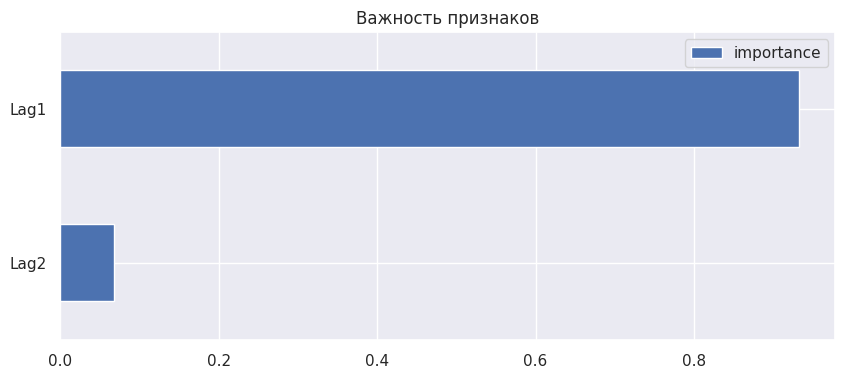

In [291]:
feature_importance_RFR = pd.DataFrame(data=model_RFR.feature_importances_,
             index=model_RFR.feature_names_in_,
             columns=['importance'])
feature_importance_RFR.sort_values('importance').plot(kind='barh', title='Важность признаков')
plt.show()

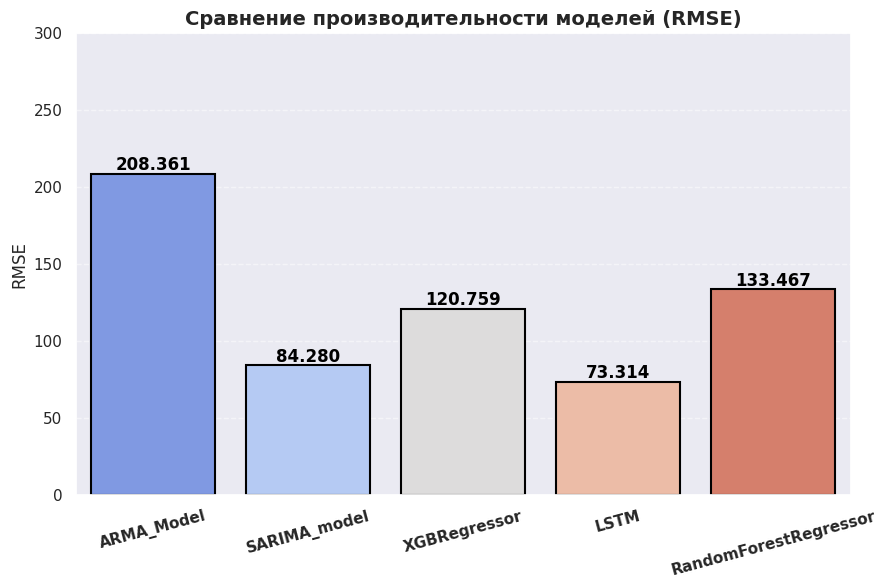

In [295]:
#ИТОГИ
models = ["ARMA_Model", "SARIMA_model", "XGBRegressor", "LSTM", "RandomForestRegressor"]
rmse = [rmse_ARMA, rmse_SARIMA, rmse_XGB, rmse_LSTM, rmse_RFR]

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=models, y=rmse, hue=models, palette="coolwarm", edgecolor="black", linewidth=1.5, legend=False)

# Adding text labels
for bar in bars.patches:
    bars.annotate(f"{bar.get_height():.3f}",
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha="center", va="bottom", fontsize=12, fontweight="bold", color="black")

plt.title("Сравнение производительности моделей (RMSE)", fontsize=14, fontweight="bold")
plt.ylabel("RMSE", fontsize=12)
plt.xticks(fontsize=11, fontweight="bold", rotation=15)
plt.ylim(0, 300)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [300]:
# Summary Table
summary_df = pd.DataFrame({
    "Model": models,
    "RMSE_score": rmse
})
summary_df = summary_df.sort_values(by="RMSE_score", ascending=True)
print("Сравнение моделей (по RMSE):\n")
print(summary_df.to_string(index=False))

# Print the best model
best_model = summary_df.iloc[0]["Model"]
print(f"\nЛучшая модель: {best_model} с RMSE равным {summary_df.iloc[0]['RMSE_score']:.3f}")

Сравнение моделей (по RMSE):

                Model  RMSE_score
                 LSTM   73.313885
         SARIMA_model   84.280027
         XGBRegressor  120.759264
RandomForestRegressor  133.467133
           ARMA_Model  208.360792

Лучшая модель: LSTM с RMSE равным 73.314
